In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CubicSplineInterpolator import CubicSplineInterpolator
%matplotlib inline

## Работа сплайна

Построим для функции cos(x) + eps кубическую интерполяцию

In [0]:
def func(xs, sigma):
    return np.cos(xs) + (np.random.rand(len(xs)) - 0.5) * sigma

def plotshow(x0, x1, N, M, sigma, CI):
    Nx = np.linspace(x0, x1, N)
    f, ax = plt.subplots(figsize=(20,8))
    ax.grid()
    ax.set_title('SomePlot')
    ax.set_xlabel('X')
    Ny = func(Nx, sigma) 
    ax.plot(Nx, Ny, label="фукнция f")
    Mx = np.linspace(x0, x1, M)
    My = func(Mx, sigma)
    ax.scatter(Mx, My, c='red', label="узлы интерполяции")
    CSI = CI(Mx, My)
    y = CSI.Compute(Nx)
    ax.plot(Nx, y, label="интерполяция кубическим сплайном")
    ax.legend()
    return CSI

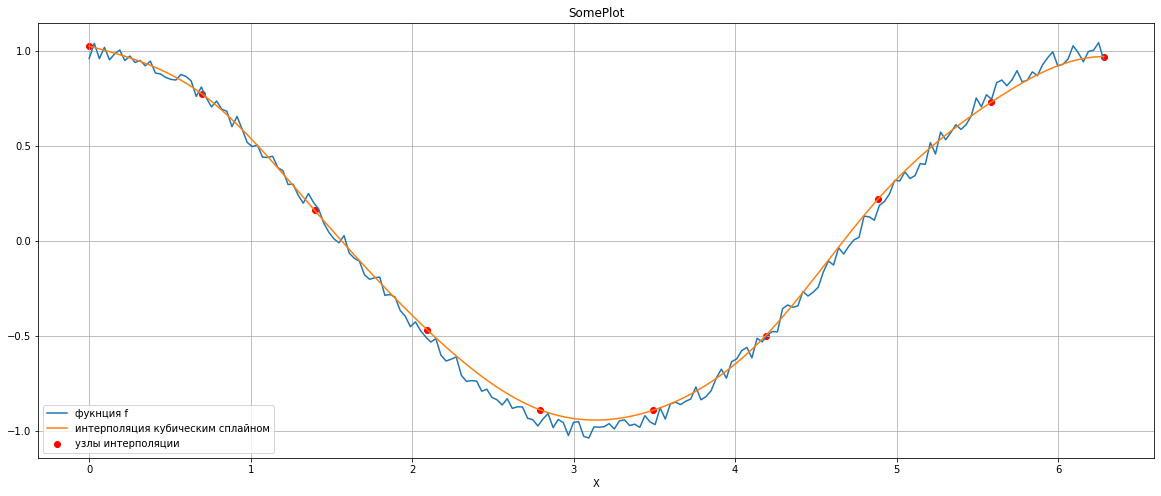

In [16]:
x0 = 0
x1 = 2 * np.pi
N = 200
M = 10
CSI = plotshow(x0, x1, N, M, 0.1, CubicSplineInterpolator)
plt.show()

Найдем производные для данной функции по сплайнам

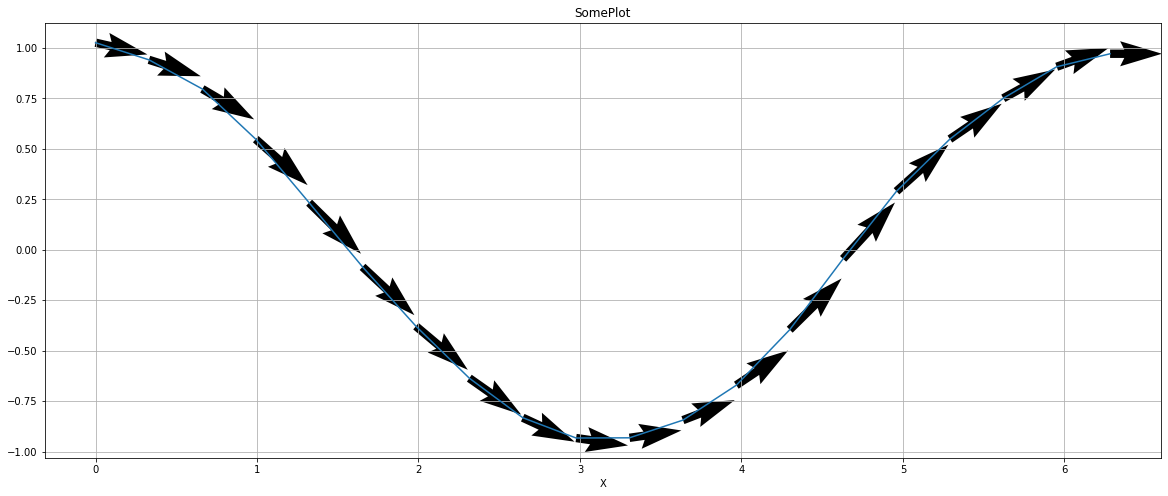

In [17]:
NX = np.linspace(x0, x1, 20)
NY = CSI.Compute(NX)
grad_x = CSI.Grad(NX)

f, ax = plt.subplots(figsize=(20,8))
ax.grid()
ax.set_title('SomePlot')
ax.set_xlabel('X')
ax.quiver(NX, NY, [1] * len(NX), grad_x)
ax.plot(NX, NY, label="фукнция f")

Проверим вычисление численного интеграла

In [0]:
Mx = np.linspace(0, 2 * np.pi, 10000)
CSI = CubicSplineInterpolator(Mx, func(Mx, 0))
assert abs(CSI.Integrate(0, np.pi/2) - 1) < 0.001, "error integral(cos(x), 0, pi/2) != 1"
assert abs(CSI.Integrate(np.pi/2, np.pi) + 1) < 0.001, "error integral(cos(x), pi/2, pi) != -1"
assert abs(CSI.Integrate(np.pi/2, 3*np.pi/2) + 2) < 0.001, "error integral(cos(x), pi/2, 3pi/2) != -2"
assert abs(CSI.Integrate(0, 2*np.pi)) < 0.001, "error integral(cos(x), 0, 2pi) != 0"